In [1]:
import pandas as pd
import numpy as np

In [3]:
pip install prophet

Looking in indexes: https://artifacts.jpmchase.net/artifactory/api/pypi/pypi/simple/Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\JPMC\DEV\TMP\ds\tools\python3.8\latest\python.exe -m pip install --upgrade pip' command.



Using legacy 'setup.py install' for pymeeus, since package 'wheel' is not installed.
    Running setup.py install for pymeeus: started
    Running setup.py install for pymeeus: finished with status 'done'


In [4]:
from prophet import Prophet

In [17]:
path=r'C:\Users\redacted\Downloads\NVDA.csv'

In [50]:
df=pd.read_csv(path, parse_dates=True)

In [51]:
df.head()

,ds,y
0,8/8/2017,42.102406
1,8/9/2017,42.549877
2,8/10/2017,40.727840
3,8/11/2017,38.557201
4,8/14/2017,41.632675


In [52]:
m= Prophet()
m.fit(df)

17:07:01 - cmdstanpy - INFO - Chain [1] start processing
17:07:02 - cmdstanpy - INFO - Chain [1] done processing


In [54]:
future= m.make_future_dataframe(periods=242)
future.tail()


,ds
1495,2023-03-31
1496,2023-04-01
1497,2023-04-02
1498,2023-04-03
1499,2023-04-04


In [55]:
forecast= m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1495,2023-03-31,205.735263,170.086735,245.935052
1496,2023-04-01,212.506090,175.093680,252.272927
1497,2023-04-02,212.211778,173.811481,253.425984
1498,2023-04-03,205.229058,168.414318,245.067750
1499,2023-04-04,204.849143,166.318828,244.467667


In [56]:
import matplotlib.pyplot as plt

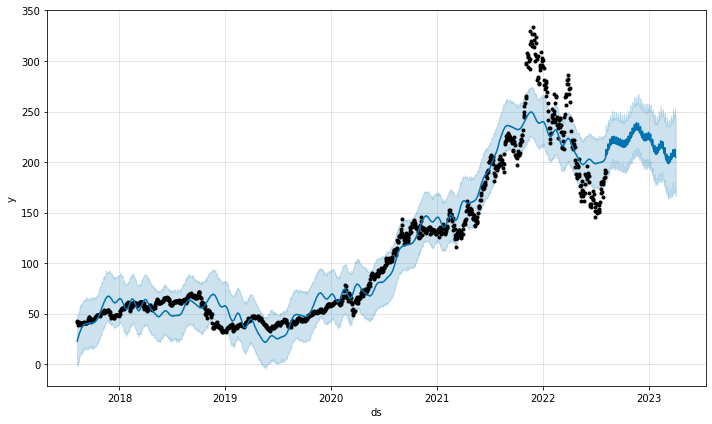

In [57]:
fig1= m.plot(forecast)

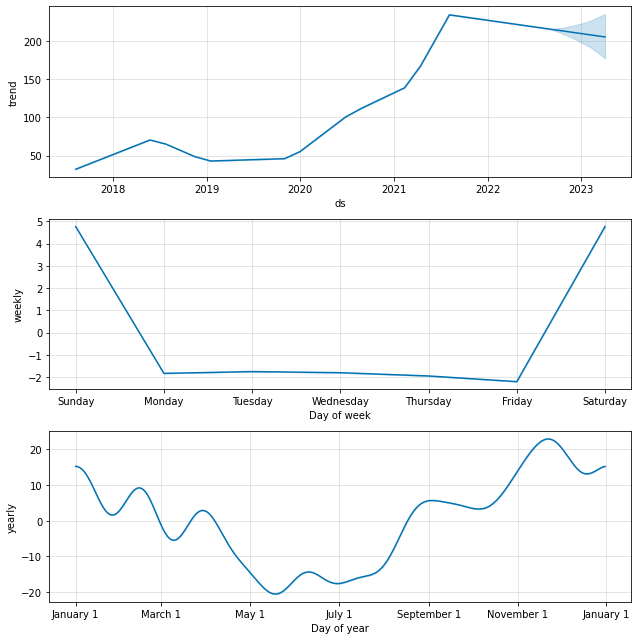

In [65]:
fig2= m.plot_components(forecast)

In [78]:
forecast.loc[1260:1270]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1260,2022-08-08,216.296483,181.914343,230.882775,216.296483,216.296483,-9.715402,-9.715402,-9.715402,-1.832462,-1.832462,-1.832462,-7.882940,-7.882940,-7.882940,0.0,0.0,0.0,206.581081
1261,2022-08-09,216.248920,183.233871,233.514785,216.248920,216.248920,-8.815093,-8.815093,-8.815093,-1.751792,-1.751792,-1.751792,-7.063301,-7.063301,-7.063301,0.0,0.0,0.0,207.433827
1262,2022-08-10,216.201357,184.913896,233.409876,216.201357,216.201357,-8.025014,-8.025014,-8.025014,-1.801823,-1.801823,-1.801823,-6.223191,-6.223191,-6.223191,0.0,0.0,0.0,208.176342
1263,2022-08-11,216.153794,185.139672,231.579376,216.153794,216.153794,-7.318700,-7.318700,-7.318700,-1.948906,-1.948906,-1.948906,-5.369794,-5.369794,-5.369794,0.0,0.0,0.0,208.835094
1264,2022-08-12,216.106231,184.346175,234.176108,216.106231,216.106231,-6.714817,-6.714817,-6.714817,-2.204248,-2.204248,-2.204248,-4.510569,-4.510569,-4.510569,0.0,0.0,0.0,209.391413
1265,2022-08-13,216.058668,193.688482,241.445415,216.058668,216.058668,1.116518,1.116518,1.116518,4.769616,4.769616,4.769616,-3.653098,-3.653098,-3.653098,0.0,0.0,0.0,217.175185
1266,2022-08-14,216.011105,192.931531,241.969951,216.011105,216.011105,1.964697,1.964697,1.964697,4.769617,4.769617,4.769617,-2.804920,-2.804920,-2.804920,0.0,0.0,0.0,217.975802
1267,2022-08-15,215.963542,188.673068,236.006400,215.963542,215.963542,-3.805840,-3.805840,-3.805840,-1.832462,-1.832462,-1.832462,-1.973378,-1.973378,-1.973378,0.0,0.0,0.0,212.157702
1268,2022-08-16,215.915979,189.163521,235.520555,215.915979,215.915979,-2.917260,-2.917260,-2.917260,-1.751792,-1.751792,-1.751792,-1.165467,-1.165467,-1.165467,0.0,0.0,0.0,212.998719
1269,2022-08-17,215.868416,187.115316,237.983433,215.868416,215.868416,-2.189522,-2.189522,-2.189522,-1.801823,-1.801823,-1.801823,-0.387699,-0.387699,-0.387699,0.0,0.0,0.0,213.678894
